# Creating ML Model for 311 Analysis

## Import Packages and Data

In [129]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
import pickle

In [130]:
# !pip install wordcloud

## WordCloud

In [131]:
# import wordcloud
from wordcloud import WordCloud

In [132]:
with open('../data/tokens.pkl', 'rb') as file:
    tokens = pickle.load(file)

In [133]:
tokens.iloc[0]

['cement',
 'street',
 'buckle',
 'one',
 'neighbor',
 'trip',
 'buckle',
 'fell',
 'face',
 'report',
 'nothin',
 'do',
 'get',
 'bad']

In [134]:
'' + tokens[0][0] + ' ' + tokens[0][1]

'cement street'

In [135]:
j=1
str1 = ''
i = 0
while i < len(tokens.iloc[j]):
    str1 = str1 + ' ' + tokens.iloc[j][i]
    i += 1

In [136]:
str1

' curb crack please fill gutter joint depress please level thank'

In [137]:
j=0
str1 = ''
while j < 10000:

    i = 0
    while i < len(tokens.iloc[j]):
        str1 = str1 + ' ' + tokens.iloc[j][i]
        i += 1
    j += 1
    
str1

' cement street buckle one neighbor trip buckle fell face report nothin do get bad curb crack please fill gutter joint depress please level thank road need repair immediately stretch fairmount area del mar height rd front torrey pine high school road condition bad pave already wear really need repave side del mar height rd thank help camino del norte i15 area condition bad lot crack road pothole really need repave area please check camino del norte really need repave thank entire street westbrook fill deep pothole street desperately need resurface large pothole unsuspecting place well speed bump uneven jag concern child health surface jar even take 10 mph everyone rid car experience discomfort bonk head whiplash awful bump support would like keep road safe child road definitely however believe smooth well design speed hump would serve purpose well fill deep pothole plague road thank please send crew repair scripps ranch blvd affinity court erma road street mess long rut groove pothole 

In [138]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [139]:
stopwords = stopwords.words("english")
new_stops = ['city','area','one','report','leave','need','go','please','way','thank','get','also','come','miss','san','diego','make','side','st',
            'work','request','near','along','fix','ave','see','dr']

In [140]:
i=0
while i < len(new_stops):
    stopwords.append(new_stops[i])
    i+=1

In [141]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

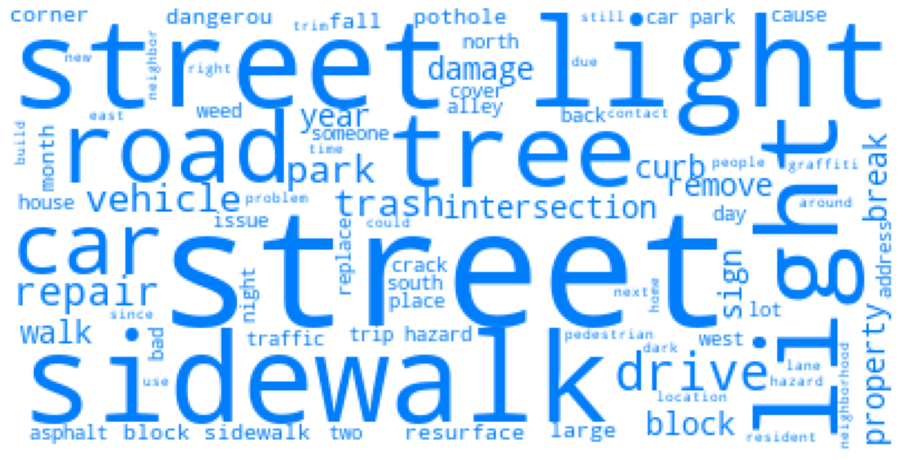

In [142]:
wordcloud = WordCloud(stopwords = stopwords,max_words=80, background_color='white').generate(str1)
# plt.imshow(wordcloud)

def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(210,100%%, %d%%)" % np.random.randint(49,51))

wordcloud.recolor(color_func = grey_color_func)

from matplotlib import rcParams
rcParams["figure.figsize"] = (16,10)
plt.imshow(wordcloud)
plt.axis('off')
# plt.show()
plt.savefig('wordcloud.png')

## Top Five Request Types

In [143]:
requests_21 = pd.read_csv('../data/2021_closed_requests.csv', low_memory=False)
requests_22 = pd.read_csv('../data/2022_closed_requests.csv', low_memory=False)

In [144]:
print("Shape of 2021 data:", requests_21.shape)
print("Shape of 2022 data:", requests_22.shape)

Shape of 2021 data: (359090, 23)
Shape of 2022 data: (348924, 23)


In [145]:
requests_21.isna().sum()

service_request_id                0
service_request_parent_id    320300
sap_notification_number      312452
date_requested                    0
case_age_days                     8
case_record_type                  0
service_name                      0
service_name_detail          110504
date_closed                       8
status                            0
lat                            2609
lng                            2609
street_address                  534
zipcode                      125914
council_district               2925
comm_plan_code                 2984
comm_plan_name                 2984
park_name                    340158
case_origin                      34
referred                     297104
iamfloc                      166284
floc                         166145
public_description            25982
dtype: int64

In [146]:
requests_21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359090 entries, 0 to 359089
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   service_request_id         359090 non-null  int64  
 1   service_request_parent_id  38790 non-null   float64
 2   sap_notification_number    46638 non-null   float64
 3   date_requested             359090 non-null  object 
 4   case_age_days              359082 non-null  float64
 5   case_record_type           359090 non-null  object 
 6   service_name               359090 non-null  object 
 7   service_name_detail        248586 non-null  object 
 8   date_closed                359082 non-null  object 
 9   status                     359090 non-null  object 
 10  lat                        356481 non-null  float64
 11  lng                        356481 non-null  float64
 12  street_address             358556 non-null  object 
 13  zipcode                    23

In [147]:
requests_21 = requests_21.drop(['service_request_id','sap_notification_number','case_record_type','date_closed','status','lat','lng','street_address','zipcode','comm_plan_code','comm_plan_name','referred','iamfloc','floc'], axis=1)

#### service_request_parent_id
- indicates duplicate requests
- ONLY kept null values

In [148]:
print("number unique values:", len(requests_21[requests_21[['service_request_parent_id']].notnull().all(1)]['service_request_parent_id'].unique()))
print("number all values:", len(requests_21[requests_21[['service_request_parent_id']].notnull().all(1)]['service_request_parent_id']))

requests_21['service_request_parent_id'].fillna(0, inplace = True)
requests_21 = requests_21[requests_21['service_request_parent_id'] == 0]

number unique values: 23827
number all values: 38790


#### case_age_days
- this column is key and will be the 'y' column in the ML algorithm
- float64
- drop all with null values (there are only 7)

In [149]:
# #drop null values
# requests_21 = requests_21.dropna(subset=['case_age_days'])
# requests_21['case_age_days'].isna().any()

#### council_district
- drop those with no listed council district

In [150]:
# #drop null values
# requests_21 = requests_21.dropna(subset=['council_district'])
# requests_21['council_district'].isna().any()

#### case_origin

In [151]:
# only keep the rows with the following origins: Mobile, Web, Phone
requests_21 = requests_21[(requests_21['case_origin'] == 'Mobile') | (requests_21['case_origin'] == 'Web') | (requests_21['case_origin'] == 'Phone')]

#### public_description
- drop those with no public description

In [152]:
#drop null values
requests_21 = requests_21.dropna(subset=['public_description'])
requests_21['public_description'].isna().any()

False

### service_name

In [153]:
#drop null values
requests_21 = requests_21.dropna(subset=['service_name'])
requests_21['service_name'].isna().any()

False

In [154]:
requests_21.head()

,service_request_parent_id,date_requested,case_age_days,service_name,service_name_detail,council_district,park_name,case_origin,public_description
0,0.0,2016-08-17T16:40:00,1654.0,Pavement Maintenance,CONCRETE PAVEMENT REPAIR ISSUE,5.0,NaN,Web,We have a cement street it is buckling and one...
2,0.0,2016-08-18T04:17:00,1652.0,Pavement Maintenance,DAMAGED CURB,2.0,NaN,Web,"curb cracked, please fill\ngutter joint depres..."
4,0.0,2016-08-21T12:19:00,1838.0,Pavement Maintenance,EVALUATE FOR RESURFACING/SLURRY,9.0,NaN,Mobile,This road needs To be repaired immediately
6,0.0,2016-08-24T15:31:00,1834.0,Pavement Maintenance,EVALUATE FOR RESURFACING/SLURRY,9.0,NaN,Phone,STRETCH OF FAIRMOUNT
7,0.0,2016-08-24T16:56:00,1882.0,Pavement Maintenance,EVALUATE FOR RESURFACING/SLURRY,1.0,NaN,Web,This area on Del Mar Heights Rd in front of th...


## Case Origins

In [155]:
requests_21_origin= pd.read_csv('../data/2021_closed_requests.csv', low_memory=False)

In [156]:
requests_21_origin = requests_21_origin[(requests_21_origin['case_origin'] == 'Mobile') | (requests_21_origin['case_origin'] == 'Web') | (requests_21_origin['case_origin'] == 'Phone')]

In [157]:
origins = pd.DataFrame(requests_21_origin['case_origin'].value_counts()).reset_index()
origins.columns = ['case_origin','number of requests']
origins

,case_origin,number of requests
0,Mobile,217359
1,Web,69259
2,Phone,28445


In [158]:
list(requests_21['public_description'].sample(20))

['Abandoned car',
 'Sunday mess all over pb BIRD',
 'I work at Lafayette Elementary School.  This car has been parked in our bus loading zone for a 7 days.  Busses drop off students everyday along this area.  The neighbors told me that the owner of the car was arrested and put in jail last week.  So this car needs to be towed.',
 'Sign cannot be read',
 'Truck has been parked illegally, in a ?no parking? area, for 5 days. Also saw someone sleeping',
 'Graffiti',
 'Extensive damage, not safe since most is no longer attached, months like this',
 'Light has been out for a couple weeks now, there?s also lights out on the Del sol and Del sur intersection',
 'Graffiti is on the western wall of Mira Mesa Community park.',
 'Tree growing over power pole',
 'Illegally parked vehicle',
 'VC violation',
 'Vehicle has been parked for several weeks in the same parking place. Seems abandoned.',
 'Is legally parked on sidewalk blocking it',
 'Translated: Potholes',
 'Homeless encampment at 4605 32nd 

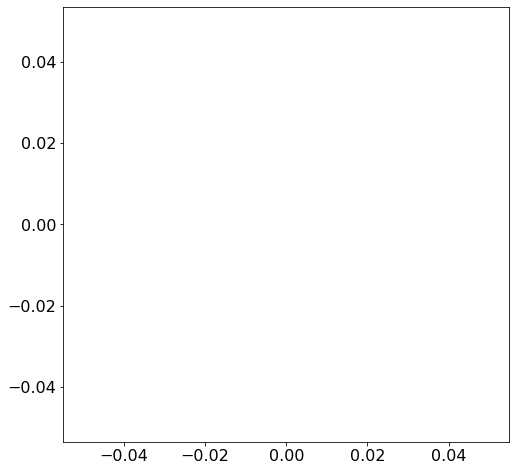

In [159]:
plt.figure(figsize=(8, 8)) # change the size of a figure# The slices will be ordered and plotted counter-clockwise.
labels = origins['case_origin']
sizes = origins['number of requests']
colors = ['#FFB600', '#09A0DA','#8464a0'] #define colors of three donut pieces
explode = (0, 0, 0) # explode a slice if required
textprops = {"fontsize":14,'color':'black'} # Font size of text in donut chartplt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%.2f%%', # Show data in 0.00%
pctdistance =0.9,
shadow=False,
textprops =textprops,
wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'}

#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.65,color='grey', fc='white',linewidth=1.00)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal') # Set aspect ratio to be equal so that pie is      drawn as a circle.
plt.show()

## Feature Engineering

### date_requested
Include following features:
- day_of_week
- is_weekend
- month

In [160]:
# # create vectorized strptime function to use in pandas
# vectorized_strptime = np.vectorize(datetime.strptime)

# # apply vectorized strptime function to df
# requests_21['date_requested'] = vectorized_strptime(requests_21['date_requested'], '%Y-%m-%dT%H:%M:00')

In [161]:
# requests_21['day_of_week'] = requests_21['date_requested'].dt.dayofweek

In [162]:
# requests_21['is_weekend'] = np.where(requests_21['day_of_week'] < 5, 0, 1)

In [163]:
# requests_21['month'] = requests_21['date_requested'].dt.month

#### feature: day

In [164]:
# requests_21pro = pd.get_dummies(requests_21, columns=['day_of_week'], prefix='day', prefix_sep='_', drop_first=False)

#### feature: month

In [165]:
# requests_21pro = pd.get_dummies(requests_21pro, columns=['month'], prefix='month', prefix_sep='_', drop_first=False)

### service_name and service_name_detail

In [166]:
# requests_21['service_name'].value_counts()

In [167]:
# #reclassify the one 'homeless outreach' request as encampment
# requests_21['service_name'] = np.where(requests_21['service_name'] == 'Homeless Outreach', 
#                                     'Encampment', 
#                                     requests_21['service_name'])

In [168]:
service_name_details_to_keep = list(requests_21['service_name_detail'].value_counts().head(25).reset_index().iloc[:,0].values)

In [169]:
#enhance service type column by using service_name_details, where available
requests_21['detailed_type'] = np.where(requests_21['service_name_detail'].isin(service_name_details_to_keep) == True, 
                                        requests_21['service_name_detail'], 
                                        requests_21['service_name'])

In [170]:
# define replacement value function
def replace_service(old_name, new_name):
    requests_21['detailed_type'] = np.where(requests_21['service_name_detail'] == old_name, 
                                        new_name, 
                                        requests_21['detailed_type'])


In [171]:
replace_service('STREET LIGHT OUT', 'Street Light Out of Service')
replace_service('CONCRETE SIDEWALK REPAIR ISSUE', 'Sidewalk Repair Issue')
replace_service('LIGHTS OUT', 'Traffic Signal Out of Service')
replace_service('SWPP - Storm Water Polution Prevention', 'Stormwater Pollution Prevention')
replace_service('EVALUATE TREE FOR REMOVAL', 'Tree Removal')
replace_service('LIGHTS ON FLASH', 'Flashing Traffic Signal Lights')
replace_service('POLE KNOCK OVER/DAMAGE', 'Damaged/Knocked Over Pole')
replace_service('LIMB FALLEN OR HANGING', 'Fallen/Hanging Tree Limb')
replace_service('DRAIN INLET', 'Drain Inlet')
replace_service('Out Late', 'Container Out Late')
replace_service('CONTRACTUAL TRIMMING', 'Trimming Request')
replace_service('EVALUATE FOR RESURFACING/SLURRY', 'Resurfacing Evaluation')
replace_service('TRIM TREE FOR PEDS/VEHICLE CLEARANCE', 'Tree Trimming for Pedestrian/Vehicle Clearance')

In [172]:
#reclassify the 2 'Graffiti' request as 'Graffiti Removal'
requests_21['detailed_type'] = np.where(requests_21['detailed_type'] == 'Graffiti', 
                                    'Graffiti Removal', 
                                    requests_21['detailed_type'])

In [173]:
requests_21['detailed_type'].isna().any()

False

In [174]:
top5 = pd.DataFrame(requests_21['detailed_type'].value_counts().head(5)).reset_index()
top5

,index,detailed_type
0,Missed Collection,37502
1,72 Hour Violation,27343
2,Encampment,26245
3,Graffiti Removal,24870
4,Shared Mobility Device,19781


In [175]:
top5.columns=['detailed_type','count']
top5

,detailed_type,count
0,Missed Collection,37502
1,72 Hour Violation,27343
2,Encampment,26245
3,Graffiti Removal,24870
4,Shared Mobility Device,19781


In [176]:
top5['count'] = round(top5['count']/1000,1)

In [177]:
top5.columns

Index(['detailed_type', 'count'], dtype='object')

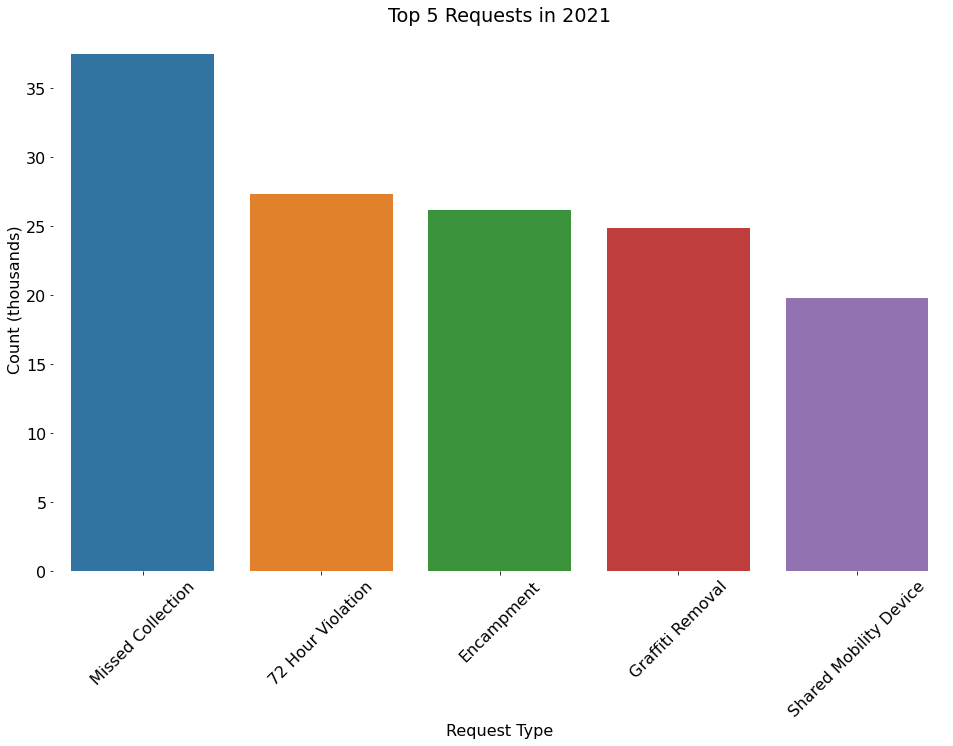

In [178]:
import seaborn as sns

fig, ax = plt.subplots()
sns.barplot(data=top5, x="detailed_type", y="count")

rcParams["figure.figsize"] = (18,7)
import matplotlib 
matplotlib.rc('xtick', labelsize=16)
# matplotlib.rc('xlabel', labelsize=12) 
matplotlib.rc('ytick', labelsize=16)

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

for spine in ax.spines:
    ax.spines[spine].set_visible(False)

matplotlib.rc('font', **font)
ax.set_title('Top 5 Requests in 2021')
ax.set_xlabel('Request Type')
ax.set_ylabel('Count (thousands)')
plt.xticks(rotation=45)
# plt.axis('off')
plt.savefig('top5_plot.png')

In [179]:
# from matplotlib import rcParams


In [180]:
categories_df = requests_21[['service_name','detailed_type']]

In [181]:
categories_df = categories_df.drop_duplicates(keep='first')

In [182]:
list(categories_df.head(53).sort_values('service_name')['service_name'].drop_duplicates(keep='first').values)

['COVID-19',
 'Dead Animal',
 'Development Services - Code Enforcement',
 'Encampment',
 'Environmental Services Code Compliance',
 'Graffiti',
 'Graffiti - Code Enforcement',
 'Illegal Dumping',
 'Missed Collection',
 'Other',
 'Oversized Vehicle',
 'Parking',
 'Pavement Maintenance',
 'Pothole',
 'ROW Maintenance',
 'Right-of-Way Code Enforcement',
 'Shared Mobility Device',
 'Sidewalk Repair Issue',
 'Stormwater',
 'Stormwater Code Enforcement',
 'Street Flooded',
 'Street Light Maintenance',
 'Street Sweeping',
 'Traffic Engineering',
 'Traffic Sign Maintenance',
 'Traffic Signal Issue',
 'Traffic Signal Timing',
 'Trash/Recycling Collection',
 'Tree Maintenance',
 'Waste on Private Property',
 'Weed Cleanup']

In [183]:
categories_df.head(53).sort_values('service_name').head(10)

,service_name,detailed_type
17884,COVID-19,COVID-19
25244,Dead Animal,Dead Animal
36996,Development Services - Code Enforcement,Development Services - Code Enforcement
4513,Development Services - Code Enforcement,Quality of Life Issues
4294,Encampment,Encampment
2833,Environmental Services Code Compliance,Environmental Services Code Compliance
3060,Environmental Services Code Compliance,Container Left Out
5953,Environmental Services Code Compliance,Encroachment
2226,Graffiti,Graffiti Removal
4987,Graffiti - Code Enforcement,Graffiti Removal - Commercial


In [184]:
#create function to access list of subcategories based on category input
def subcategory(category):
    sub_list = tuple(categories_df.head(53).sort_values('service_name')[categories_df.head(53).sort_values('service_name')['service_name'] == category]['detailed_type'].values)
    return sub_list

In [185]:
subcategory('Environmental Services Code Compliance')

('Environmental Services Code Compliance',
 'Container Left Out',
 'Encroachment')

In [186]:
with open('../data/categories_df.pkl', 'wb') as file:
    pickle.dump(categories_df, file)

In [187]:
# requests_21pro['detailed_type'] = requests_21['detailed_type']
# requests_21pro['detailed_type_dummy'] = requests_21pro['detailed_type']
# 
# requests_21pro = pd.get_dummies(requests_21pro, columns=['detailed_type_dummy'], prefix='', prefix_sep='', drop_first=False)

### council_district

#### feature: cd

In [188]:
# requests_21pro = pd.get_dummies(requests_21pro, columns=['council_district'], prefix='cd', prefix_sep='_', drop_first=False)

### in_park
- convert to binary feature - 1 if in park, 0 if not in park

In [189]:
# requests_21['in_park'] = np.where(requests_21['park_name'].isna() == True, 0, 1)
# requests_21['in_park'].value_counts()

In [190]:
# requests_21pro['in_park'] = requests_21['in_park']

### is_phone

#### is_phone
- describes whether person called in or requested via web or mobile app

In [191]:
# requests_21['is_phone'] = np.where((requests_21['case_origin'] == 'Mobile') | (requests_21['case_origin'] == 'Web'), 0, 1)
# requests_21['is_phone'].value_counts()

In [192]:
# requests_21pro['is_phone'] = requests_21['is_phone']

## NLP Processing

### Imports

In [193]:
#import required packages NLP
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk.stem import PorterStemmer

import string
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mnicn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [194]:
# # Import StandardScaler
# from sklearn.preprocessing import StandardScaler

### Cleaning

In [195]:
ENGstopwords = stopwords.words('english')

In [196]:
#define cleaning function

def clean(text):
    
    # remove punctuation    
    text = "".join([char for char in text if char not in string.punctuation])

    # tokenize words
    tokens = text.split()

    # remove all stopwords
    tokens_no_stopwords = [word for word in tokens if word not in ENGstopwords]

    # lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens_n = [lemmatizer.lemmatize(token) for token in tokens_no_stopwords]
    lemmatized_tokens_v = [lemmatizer.lemmatize(token, pos ="v") for token in lemmatized_tokens_n]
    lemmatized_tokens_a = [lemmatizer.lemmatize(token, pos ="a") for token in lemmatized_tokens_v]
    lemmatized_tokens_r = [lemmatizer.lemmatize(token, pos ="r") for token in lemmatized_tokens_a]
    lemmatized_tokens_s = [lemmatizer.lemmatize(token, pos ="s") for token in lemmatized_tokens_r]
        
    return lemmatized_tokens_s

In [197]:
requests_21['tokens'] = requests_21['public_description'].apply(lambda x: clean(x.lower()))

#### feature: word_count

In [198]:
# define function to create tokens WITH stopwords
def count_all_words(text):
    
    # remove punctuation    
    text = "".join([char for char in text if char not in string.punctuation])

    # tokenize words
    tokens = text.split()
        
    return len(tokens)

In [200]:
requests_21['word_count'] = requests_21['public_description'].apply(lambda x: count_all_words(x.lower()))

In [228]:
print("min:", requests_21['word_count'].min())
print("mean:", round(requests_21['word_count'].mean(),1))
print("max:", requests_21['word_count'].max())  
print("median:", requests_21['word_count'].median())  

min: 0
mean: 14.8
max: 456
median: 8.0


In [222]:
requests_21.columns

Index(['service_request_parent_id', 'date_requested', 'case_age_days',
       'service_name', 'service_name_detail', 'council_district', 'park_name',
       'case_origin', 'public_description', 'detailed_type', 'tokens',
       'word_count'],
      dtype='object')

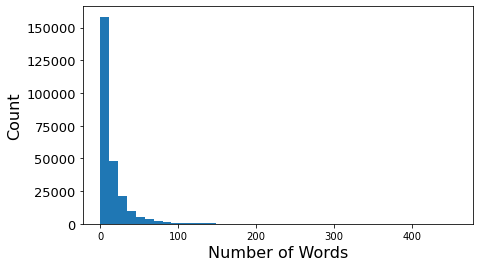

In [221]:
fig, ax = plt.subplots()
ax.hist(requests_21['word_count'], bins=40)
rcParams["figure.figsize"] = (7,4)
matplotlib.rc('xtick', labelsize=10)
# matplotlib.rc('xlabel', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
ax.set_ylabel('Count')
ax.set_xlabel('Number of Words')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

In [227]:
print("min:", requests_21['case_age_days'].min())
print("mean:", round(requests_21['case_age_days'].mean(),1))
print("max:", requests_21['case_age_days'].max())  
print("median:", requests_21['case_age_days'].median())  

min: 0.0
mean: 39.8
max: 1968.0
median: 6.0


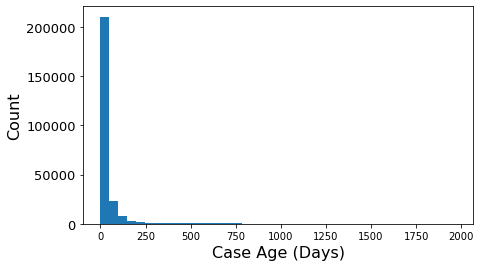

In [225]:
fig, ax = plt.subplots()
ax.hist(requests_21['case_age_days'], bins=40)
rcParams["figure.figsize"] = (7,4)
matplotlib.rc('xtick', labelsize=10)
# matplotlib.rc('xlabel', labelsize=13) 
matplotlib.rc('ytick', labelsize=13)
ax.set_ylabel('Count')
ax.set_xlabel('Case Age (Days)')
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 16}

In [ ]:
#standardize word count column

# Instantiate StandardScaler
count_scaler = StandardScaler()

# Fit SS_scaler to the data
count_scaler.fit(requests_21pro[['word_count']])

# Transform the data using the fitted scaler
requests_21pro['word_count'] = count_scaler.transform(requests_21pro[['word_count']])

In [ ]:
pickle.dump(count_scaler, open('../data/count_scaler.pkl', 'wb'))

## Modeling

In [53]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### a - SIMPLE model - binary in_park and numerical council_district only

In [54]:
# requests_21a = requests_21

In [55]:
# X = requests_21a[['in_park', 'council_district']]
# y = requests_21a['case_age_days']

In [56]:
# X.head()

In [57]:
# y.head()

In [58]:
# import xgboost as xgb
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import r2_score

In [59]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [60]:
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [61]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

In [62]:
# xg_reg.fit(X_train, y_train)

In [63]:
# preds = xg_reg.predict(X_test)

In [64]:
# print(preds)

In [65]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

In [66]:
# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [67]:
# model_columns = list(X_test.columns)
# with open('../data/model_columns.pkl', 'wb') as file:
#     pickle.dump(model_columns, file)

In [68]:
# import pickle

    
# pickle.dump(xg_reg, open('../data/simple_model.pkl', 'wb'))

In [69]:
# with open('../data/simple_model.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

In [70]:
# test_pickle

In [71]:
# # in_park_binary = (0,1)

# # council_districts = (1,2,3,4,5,6,7,8,9)

# in_park = 1
# council_district = 3

# # st.write(in_park)
# # st.write(council_district)

# # ok = st.button("Predict Response Time")

# # if ok == True:
# X_dict = {'in_park': [in_park], 'council_district': [council_district]}
# X = pd.DataFrame(X_dict)

In [72]:
# y_pred = test_pickle.predict(X)

# # response_time = xg_reg.predict(X)
# # response_time
# # st.write(response_time[0])

In [73]:
# y_pred

### b - SIMPLE model - binary in_park and one-hot council district

In [74]:
# requests_21b = requests_21

In [75]:
# requests_21b.columns

In [76]:
# X = requests_21[['in_park', 'cd_1.0', 'cd_2.0', 'cd_3.0', 'cd_4.0',
#        'cd_5.0', 'cd_6.0', 'cd_7.0', 'cd_8.0', 'cd_9.0']]
# y = requests_21['case_age_days']

In [77]:
# X.head()

In [78]:
# y.head()

In [79]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [80]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_test)

# print(preds)

In [81]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [82]:
# pickle.dump(xg_reg, open('../data/simple_model_b.pkl', 'wb'))

In [83]:
# with open('../data/simple_model_b.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

### c - SIMPLE model - binary in_park, one-hot council district, one-hot weekday, one-hot month, is_weekend

In [84]:
# requests_21c = requests_21

In [85]:
# X = requests_21c[['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#                   'is_weekend',
#                  'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
#                  'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
#                  'in_park',
#                  'cd_1.0', 'cd_2.0', 'cd_3.0',
#                  'cd_4.0', 'cd_5.0', 'cd_6.0',
#                  'cd_7.0', 'cd_8.0', 'cd_9.0'
#                 ]]
# y = requests_21c['case_age_days']

In [86]:
# print(X.columns)

In [87]:
# X.head(2)

In [88]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [89]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_test)

In [90]:
# print(preds)

In [91]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [92]:
# pickle.dump(xg_reg, open('../data/simple_model_c.pkl', 'wb'))

# with open('../data/simple_model_c.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

### d - SIMPLE model: add is_phone feature
- binary in_park
- one-hot council district
- one-hot weekday
- one-hot month
- is_weekend
- is_phone

In [93]:
# requests_21d = requests_21

In [94]:
# X = requests_21d[['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#                   'is_weekend',
#                  'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
#                  'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
#                  'in_park',
#                  'cd_1.0', 'cd_2.0', 'cd_3.0',
#                  'cd_4.0', 'cd_5.0', 'cd_6.0',
#                  'cd_7.0', 'cd_8.0', 'cd_9.0', 
#                   'is_phone'
#                 ]]
# y = requests_21d['case_age_days']

In [95]:
# print(X.columns)

In [96]:
# X.head(2)

In [97]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [98]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_test)

# print(preds)

In [99]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

In [100]:
# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [101]:
# pickle.dump(xg_reg, open('../data/simple_model_d.pkl', 'wb'))

# with open('../data/simple_model_d.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

### e - SIMPLE model: add text feature

In [102]:
# requests_21e = requests_21

In [103]:
# X = requests_21e[['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#                   'is_weekend',
#                  'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
#                  'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
#                  'in_park',
#                  'cd_1.0', 'cd_2.0', 'cd_3.0',
#                  'cd_4.0', 'cd_5.0', 'cd_6.0',
#                  'cd_7.0', 'cd_8.0', 'cd_9.0', 
#                   'is_phone',
#                   'word_count_SS'
#                 ]]
# y = requests_21e['case_age_days']

In [104]:
# print(X.columns)

In [105]:
# X.head(2)

In [106]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [107]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_test)

# print(preds)

In [108]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [109]:
# pickle.dump(xg_reg, open('../data/simple_model_e.pkl', 'wb'))

# with open('../data/simple_model_e.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

### f - Model with service_name

In [110]:
# requests_21f = requests_21

In [111]:
# list(requests_21f.columns)

In [112]:
# requests_21['detailed_type']

In [113]:
# X = requests_21f[['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
#                   'is_weekend',
#                  'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
#                  'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
#                  'in_park',
#                  'cd_1.0', 'cd_2.0', 'cd_3.0',
#                  'cd_4.0', 'cd_5.0', 'cd_6.0',
#                  'cd_7.0', 'cd_8.0', 'cd_9.0', 
#                   'is_phone',
#                   'word_count_SS',
#                   'COVID-19',
# 'Dead Animal',
# 'Development Services - Code Enforcement',
# 'Encampment',
# 'Environmental Services Code Compliance',
# 'Graffiti',
# 'Graffiti - Code Enforcement',
# 'Illegal Dumping',
# 'Missed Collection',
# 'Other',
# 'Oversized Vehicle',
# 'Parking',
# 'Pavement Maintenance',
# 'Pothole',
# 'ROW Maintenance',
# 'Right-of-Way Code Enforcement',
# 'Shared Mobility Device',
# 'Sidewalk Repair Issue',
# 'Stormwater',
# 'Stormwater Code Enforcement',
# 'Street Flooded',
# 'Street Light Maintenance',
# 'Street Sweeping',
# 'Traffic Engineering',
# 'Traffic Sign Maintenance',
# 'Traffic Signal Issue',
# 'Traffic Signal Timing',
# 'Trash/Recycling Collection',
# 'Tree Maintenance',
# 'Waste on Private Property',
# 'Weed Cleanup'
#                 ]]
# y = requests_21f['case_age_days']

In [114]:
# print(X.columns)

In [115]:
# (X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [116]:
# #Instantiate model
# xg_reg = xgb.XGBRegressor()

# xg_reg.fit(X_train, y_train)

# preds = xg_reg.predict(X_test)

# print(preds)

In [117]:
# rmse = np.sqrt(mean_squared_error(y_test,preds))

# print("RMSE: %f" % (rmse))

# r2 = r2_score(y_test, xg_reg.predict(X_test))
# print(r2)

In [118]:
# pickle.dump(xg_reg, open('../data/simple_model_f.pkl', 'wb'))

# with open('../data/simple_model_f.pkl', 'rb') as file:
#     test_pickle = pickle.load(file)

### g - Model with service_name and w2v

In [119]:
requests_21pro_g = requests_21pro

#### feature: word2vec

In [120]:
#remove those with zero tokens
requests_21pro_g = requests_21pro_g[requests_21pro_g['tokens'] != 0]
requests_21pro_g.shape[0]

252369

In [121]:
requests_21pro_g['tokens'].values[0:4]

array([list(['cement', 'street', 'buckle', 'one', 'neighbor', 'trip', 'buckle', 'fell', 'face', 'report', 'nothin', 'do', 'get', 'bad']),
       list(['curb', 'crack', 'please', 'fill', 'gutter', 'joint', 'depress', 'please', 'level', 'thank']),
       list(['road', 'need', 'repair', 'immediately']),
       list(['stretch', 'fairmount'])], dtype=object)

In [122]:
# create list of unique tokens

unique_tokens = []

i = 0

while i < len(requests_21pro_g['tokens']):
    unique_tokens.append(list(set(requests_21pro_g['tokens'].values[i])))
    i += 1

In [123]:
requests_21pro_g['unique_tokens'] = unique_tokens

In [124]:
import gensim

corpus_unique = unique_tokens
Model_CBoW = gensim.models.Word2Vec(corpus_unique, vector_size=30, window = 3, min_count = 1)

In [125]:
pickle.dump(Model_CBoW, open('../data/Model_CBoW.pkl', 'wb'))

In [126]:
test = Model_CBoW.wv['encampment']
list(test)

[2.0234628,
 -2.1383579,
 -2.747565,
 -0.8033811,
 -0.11328589,
 -5.4509993,
 1.8880179,
 -0.78000295,
 0.7853557,
 -3.8508036,
 1.1071103,
 -3.9848683,
 0.4253955,
 -0.73996943,
 -0.24612477,
 1.313378,
 -2.5998948,
 -1.4999491,
 -0.5626448,
 1.0044271,
 -0.31187963,
 0.29653177,
 -1.134919,
 -0.053141512,
 0.5902342,
 -6.970355,
 -1.8701583,
 -1.3224641,
 -2.83042,
 -2.5489922]

In [127]:
#creates w2v vector in each row
x = 0
w2v = []

while x < requests_21pro_g.shape[0]:
    f_tokens = requests_21pro_g.iloc[x,-1]
    if(len(f_tokens) != 0):
        w2v.append(Model_CBoW.wv[f_tokens[0]])
    else:
        w2v.append(0)
    
    z = 1
    
    while z < len(f_tokens):
        w2v[x] = w2v[x] + Model_CBoW.wv[f_tokens[z]]
        
        z += 1
    
    x += 1

In [128]:
requests_21pro_g['w2v'] = w2v

In [129]:
encampments = requests_21pro_g[requests_21pro_g['public_description'] == 'Encampment']

In [130]:
w2v_array_encampment = encampments['w2v'].head(1).values
w2v_array_encampment

array([array([ 2.0234628 , -2.1383579 , -2.747565  , -0.8033811 , -0.11328589,
              -5.4509993 ,  1.8880179 , -0.78000295,  0.7853557 , -3.8508036 ,
               1.1071103 , -3.9848683 ,  0.4253955 , -0.73996943, -0.24612477,
               1.313378  , -2.5998948 , -1.4999491 , -0.5626448 ,  1.0044271 ,
              -0.31187963,  0.29653177, -1.134919  , -0.05314151,  0.5902342 ,
              -6.970355  , -1.8701583 , -1.3224641 , -2.83042   , -2.5489922 ],
             dtype=float32)                                                    ],
      dtype=object)

In [131]:
real_type = []
i=0

while i < requests_21pro_g.shape[0]:
    real_type.append(str(type(requests_21pro_g.iloc[i,-1])))
    i+=1

print(real_type[0:10])

["<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>", "<class 'numpy.ndarray'>"]


In [132]:
requests_21pro_g['real_type'] = real_type

In [133]:
requests_21pro_g = requests_21pro_g[requests_21pro_g['real_type'] == "<class 'numpy.ndarray'>"]
requests_21pro_g.shape[0]

252197

In [134]:
list(requests_21pro_g.columns)

['service_request_parent_id',
 'date_requested',
 'case_age_days',
 'service_name',
 'service_name_detail',
 'park_name',
 'case_origin',
 'public_description',
 'is_weekend',
 'day_0',
 'day_1',
 'day_2',
 'day_3',
 'day_4',
 'day_5',
 'day_6',
 'month_1',
 'month_2',
 'month_3',
 'month_4',
 'month_5',
 'month_6',
 'month_7',
 'month_8',
 'month_9',
 'month_10',
 'month_11',
 'month_12',
 'detailed_type',
 '72 Hour Violation',
 'COVID-19',
 'Container Left Out',
 'Container Out Late',
 'Damaged/Knocked Over Pole',
 'Dead Animal',
 'Development Services - Code Enforcement',
 'Drain Inlet',
 'Encampment',
 'Encroachment',
 'Environmental Services Code Compliance',
 'Fallen/Hanging Tree Limb',
 'Flashing Traffic Signal Lights',
 'Graffiti Removal',
 'Graffiti Removal - Commercial',
 'Illegal Dumping',
 'Litter',
 'Missed Collection',
 'Other',
 'Oversized Vehicle',
 'Parking',
 'Parking Zone Violation',
 'Pavement Maintenance',
 'Potential Missed Collection',
 'Pothole',
 'Quality of Li

In [135]:
# create function to create columns for each of the w2v elements
def append_scale_pickle(elem_num):  
    i = 0
    w2v_list = []
    while i < len(requests_21pro_g['w2v']):
        w2v_list.append(requests_21pro_g['w2v'].iloc[i][elem_num])
        i+=1
    
    #fit scaler, pickle scaler
    SS_scaler = StandardScaler()
    SS_scaler.fit(np.array(w2v_list).reshape(-1, 1))
    pickle.dump(SS_scaler, open('../data/SS_scaler_w2v_' + str(elem_num) + '.pkl', 'wb'))
    
    requests_21pro_g['w2v_' + str(elem_num)] = w2v_list

In [136]:
for i in list(range(30)):
    append_scale_pickle(i)

In [137]:
encampments = requests_21pro_g[requests_21pro_g['public_description'] == 'Encampment']

In [138]:
# encampments[['w2v', 'w2v_0', 'w2v_1']].head()

In [139]:
requests_21pro_g = requests_21pro_g.drop(['w2v_0',
 'w2v_1',
 'w2v_2',
 'w2v_3',
 'w2v_4',
 'w2v_5',
 'w2v_6',
 'w2v_7',
 'w2v_8',
 'w2v_9',
 'w2v_10',
 'w2v_11',
 'w2v_12',
 'w2v_13',
 'w2v_14',
 'w2v_15',
 'w2v_16',
 'w2v_17',
 'w2v_18',
 'w2v_19',
 'w2v_20',
 'w2v_21',
 'w2v_22',
 'w2v_23',
 'w2v_24',
 'w2v_25',
 'w2v_26',
 'w2v_27',
 'w2v_28',
 'w2v_29'], axis=1)

In [140]:
def unpickle_scale_append(elem_num):  
    i = 0
    #create 2D arrary to fit scaler
    w2v_list = []
    while i < len(requests_21pro_g['w2v']):
        w2v_list.append(requests_21pro_g['w2v'].iloc[i][elem_num])
        i+=1
    
    #fit scaler, pickle scaler
    with open('../data/SS_scaler_w2v_' + str(elem_num) + '.pkl', 'rb') as file:
        scaler = pickle.load(file)

    requests_21pro_g['w2v_' + str(elem_num)] = scaler.transform(np.array(w2v_list).reshape(-1, 1))


In [ ]:
for i in list(range(30)):
    unpickle_scale_append(i)

In [ ]:
encampments = requests_21pro_g[requests_21pro_g['public_description'] == 'Encampment']

In [ ]:
encampments[['w2v', 'w2v_0', 'w2v_1']].head()

In [ ]:
fig, ax = plt.subplots()
ax.hist(requests_21pro_g['w2v_0'], bins = 50)
plt.show()

In [ ]:
requests_21pro_g.columns

In [ ]:
X = requests_21pro_g[[
'day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
'is_weekend',
'month_1', 'month_2', 'month_3', 'month_4', 'month_5', 'month_6',
'month_7', 'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
'in_park',
'cd_1.0', 'cd_2.0', 'cd_3.0',
'cd_4.0', 'cd_5.0', 'cd_6.0',
'cd_7.0', 'cd_8.0', 'cd_9.0', 
'is_phone',
'word_count',
'72 Hour Violation',
'COVID-19',
'Container Left Out',
'Container Out Late',
'Damaged/Knocked Over Pole',
'Dead Animal',
'Development Services - Code Enforcement',
'Drain Inlet',
'Encampment',
'Encroachment',
'Environmental Services Code Compliance',
'Fallen/Hanging Tree Limb',
'Flashing Traffic Signal Lights',
'Graffiti Removal',
'Graffiti Removal - Commercial',
'Illegal Dumping',
'Litter',
'Missed Collection',
'Other',
'Oversized Vehicle',
'Parking',
'Parking Zone Violation',
'Pavement Maintenance',
'Potential Missed Collection',
'Pothole',
'Quality of Life Issues',
'ROW Maintenance',
'Resurfacing Evaluation',
'Right-of-Way Code Enforcement',
'Shared Mobility Device',
'Sidewalk Repair Issue',
'Stormwater',
'Stormwater Code Enforcement',
'Stormwater Pollution Prevention',
'Street Flooded',
'Street Light Maintenance',
'Street Light Out of Service',
'Street Sweeping',
'Traffic Engineering',
'Traffic Sign Maintenance',
'Traffic Signal Issue',
'Traffic Signal Out of Service',
'Traffic Signal Timing',
'Trash/Recycling Collection',
'Tree Maintenance',
'Tree Removal',
'Tree Trimming for Pedestrian/Vehicle Clearance',
'Trimming Request',
'Vegetation Encroachment',
'Waste on Private Property',
'Weed Cleanup',
'w2v_0',
'w2v_1',
'w2v_2',
'w2v_3',
'w2v_4',
'w2v_5',
'w2v_6',
'w2v_7',
'w2v_8',
'w2v_9',
'w2v_10',
'w2v_11',
'w2v_12',
'w2v_13',
'w2v_14',
'w2v_15',
'w2v_16',
'w2v_17',
'w2v_18',
'w2v_19',
'w2v_20',
'w2v_21',
'w2v_22',
'w2v_23',
'w2v_24',
'w2v_25',
'w2v_26',
'w2v_27',
'w2v_28',
'w2v_29']]
y = requests_21pro_g['case_age_days']

In [ ]:
print(X.columns)

In [ ]:
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
#Instantiate model
xg_reg = xgb.XGBRegressor()

In [ ]:
xg_reg.fit(X_train, y_train)

In [ ]:
preds = xg_reg.predict(X_test)

In [ ]:
print(preds)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" % (rmse))

In [ ]:
r2 = r2_score(y_test, xg_reg.predict(X_test))
print(r2)

In [ ]:
pickle.dump(xg_reg, open('../data/simple_model_g.pkl', 'wb'))

In [ ]:
with open('../data/simple_model_x.pkl', 'rb') as file:
    test_pickle = pickle.load(file)

In [ ]:
pickle.dump(requests_21pro_g, open('../data/processed_21_data.pkl', 'wb'))

#### Try Parameter Grid Search to Improve the Results with XGBoost

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits=5, shuffle=True, random_state=33)
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
xg_reg_gridsearch = GridSearchCV(xg_reg, params, cv=kf)
xg_reg_gridsearch.fit(X_train, y_train)
print(xg_reg_gridsearch.best_params_, xg_reg_gridsearch.best_score_)

## 5. LDA Testing

### Imports

In [ ]:
import nltk
nltk.download('stopwords')

In [ ]:
import json
import glob

#gensim imports
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models import ldamodel

# spacy imports
import spacy
from nltk.corpus import stopwords

In [ ]:
#vis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
# from pyLDAvis import gensim


### Script to Hangle JSON Data

In [ ]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        return (data)
    
def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

### Create Stopwords

In [ ]:
stopwords = stopwords.words("english")

In [ ]:
print(stopwords)

In [ ]:
# data = load_data("data/ushmm_dn.json")["texts"]

# print(data)

### Define Lemmatization
This lemmatization function works on a list of tokens.

In [ ]:
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    # nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"]) - this should be done within function but not working! in cell above. 
    texts_out = []
    for text in texts:
        #doc object (below) to contain essential metadata
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)

In [ ]:
test_text = ['My name is Melissa who are you good sir and do you have any bananas for me?']
test_doc = nlp('My name is Melissa who are you good sir and do you have any bananas for me?')
lemmatized_text = lemmatization(test_text)
print(lemmatized_text)

In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

In [ ]:
data_words = gen_words(lemmatized_text)

In [ ]:
id2word = corpora.Dictionary(data_words)

corpus =[]
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)
    
print (corpus[0][0:20])

In [ ]:
word = id2word[[0][:1][0]]
print(word)

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, 
                                            id2word=id2word, 
                                            num_topics=3, 
                                            random_state=100, 
                                            update_every=1, 
                                            chunksize=100,
                                            passes=10,
                                            alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, id2word, mds='mmds')
vis



## 5. Tensorflow Testing

In [ ]:
requests_21 = pd.read_csv('../data/2021_closed_requests.csv', low_memory=False)

In [ ]:
requests_21.head()

In [ ]:
with open('../data/categories_df.pkl', 'rb') as file:
        categories_df = pickle.load(file)

In [1]:
categories_df

NameError: name 'categories_df' is not defined

## 6. Building a Pipeline

### a. Picking Pipeline